# Import Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Importing Data

In [73]:
with open('new_eda_data.pkl', 'rb') as file:
    df = pickle.load(file)

In [74]:
# select columns for modelling
df_tags = df[['tags', 'target']].copy()

In [75]:
df_tags.reset_index(drop=True, inplace=True)

In [76]:
df_tags

,tags,target
0,[],1
1,[],0
2,[],1
3,[],0
4,[],0
...,...,...
8499,"[Data Analyst, How to become a data analyst, D...",1
8500,"[Data Analyst, How to become a Data Analyst, B...",1
8501,"[Data Analyst Salary, Data analyst with no exp...",1
8502,"[Working at a big company, Big company data an...",1


# Train, Test, Split

In [77]:
# features
X = df_tags.drop(columns=['target'])
# target
y = df_tags['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [78]:
X_train.shape

(6803, 1)

# Finding Tags to Turn Into Features

In [79]:
# store unique tag count across df
unique_tag_count = {}

# iterate through unique tags and map their count
for tag_list in X_train['tags']:

    for tag in tag_list:
        if tag.lower() in unique_tag_count:
            unique_tag_count[tag.lower()] += 1
        else:
            unique_tag_count[tag.lower()] = 1

# sort unique tag count alphabetically
unique_tag_count = dict(sorted(unique_tag_count.items()))

# find out how many unique tags we have
print(len(unique_tag_count))

27379


In [80]:
# create a dictionary of tags with a count of 100 or greater
top_unique_tag_count = {tag: unique_tag_count[tag] for tag in unique_tag_count if unique_tag_count[tag] >= 100}

In [81]:
len(top_unique_tag_count)

80

# One Hot Encoding the Tags Column

In [82]:
# create empty columns of all unique tags
for tag in top_unique_tag_count:
    X_train[tag] = X_train['tags'].apply(lambda x: 1 if tag in [i.lower() for i in x] else 0)

X_train.drop(columns=['tags'], inplace=True)

# Replicating for Test
for tag in top_unique_tag_count:
    X_test[tag] = X_test['tags'].apply(lambda x: 1 if tag in [i.lower() for i in x] else 0)

X_test.drop(columns=['tags'], inplace=True)

In [83]:
# adjust display options to show all columns
pd.set_option('display.max_columns', None)

In [84]:
X_train.shape

(6803, 80)

In [85]:
X_train.head()

,365 data science,365datascience,ai,alex the analyst,analytics,appliedaicourse,artificial intelligence,best data science course,big data,business analyst,business analytics,coding,colab,data,data analysis,data analyst,data analyst career,data analyst job,data analytics,data mining,data science,data science bootcamp,data science course,data science course for beginners,data science dojo,data science for beginners,data science jobs,data science journey,data science project,data science training,data science tutorial,data science tutorial for beginners,data scientist,data visualization,datacamp,deep learning,dl,great lakes,great learning,great learning academy,how to become a data analyst,how to learn data science,josh starmer,jupyter,ken jee,keras,krish naik deep learning,krish naik machine learning,learn data science,learn python,learn r,machine learning,machine learning tutorial,ml,neural networks,numpy,pandas,programming,py,pyspark,python,python for beginners,python programming,python tutorial,pythontutorial,r programming,r tutorial,rtutorial,scikit-learn,sklearn,spark,sql,statistics,statquest,step by step,tensorflow,tutorial,upgrad,what is data science,yt:cc=on
4998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5889,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6341,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3538,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Modelling

In [86]:
# create logistic regression object and fit it with training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [87]:
# function to calculate the accuracy, precision and recall
def apr(y_pred, y_real):       
    
    """ Calculates accuracy, precision, recall
        Requires predicted value first, and then the real value
    """
    accuracy = metrics.accuracy_score(y_real, y_pred)
    precision = metrics.precision_score(y_real, y_pred)
    recall = metrics.recall_score(y_real, y_pred)
    f1 = metrics.f1_score(y_real, y_pred)

    print(f"Accuracy:{accuracy}")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")
    print(f"F1:{f1}")

In [88]:
# predict on train data
y_train_pred = logreg.predict(X_train)

# check train data metric scores
apr(y_train_pred, y_train)

Accuracy:0.6933705718065559
Precision:0.7384335154826958
Recall:0.5970544918998527
F1:0.6602605863192181


In [89]:
# predict on test data
y_test_pred = logreg.predict(X_test)

# check test data metric scores
apr(y_test_pred, y_test)

Accuracy:0.671957671957672
Precision:0.7185185185185186
Recall:0.5685814771395076
F1:0.6348167539267016


# Threshold Tuning

In [90]:
# create a df with the test data, probabilities, and predictions based on the threshold
df_test = X_test.copy()
df_test[['prob_0', 'prob_1']] = logreg.predict_proba(X_test)
df_test['y_pred'] = np.where(df_test['prob_1']>.3, 1, 0)
df_test['y_actual'] = y_test.copy()

In [91]:
df_test

,365 data science,365datascience,ai,alex the analyst,analytics,appliedaicourse,artificial intelligence,best data science course,big data,business analyst,business analytics,coding,colab,data,data analysis,data analyst,data analyst career,data analyst job,data analytics,data mining,data science,data science bootcamp,data science course,data science course for beginners,data science dojo,data science for beginners,data science jobs,data science journey,data science project,data science training,data science tutorial,data science tutorial for beginners,data scientist,data visualization,datacamp,deep learning,dl,great lakes,great learning,great learning academy,how to become a data analyst,how to learn data science,josh starmer,jupyter,ken jee,keras,krish naik deep learning,krish naik machine learning,learn data science,learn python,learn r,machine learning,machine learning tutorial,ml,neural networks,numpy,pandas,programming,py,pyspark,python,python for beginners,python programming,python tutorial,pythontutorial,r programming,r tutorial,rtutorial,scikit-learn,sklearn,spark,sql,statistics,statquest,step by step,tensorflow,tutorial,upgrad,what is data science,yt:cc=on,prob_0,prob_1,y_pred,y_actual
319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.521720,0.478280,1,1
1337,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.521720,0.478280,1,1
1205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.521720,0.478280,1,1
4359,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.521720,0.478280,1,0
6571,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.144465,0.855535,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6325,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.521720,0.478280,1,1
5976,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.521720,0.478280,1,1
6247,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.355593,0.644407,1,0
2927,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.407429,0.592571,1,1


In [92]:
# function to get metrics and confusion matrix
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

In [93]:
get_results(y_test, df_test['y_pred'])

The confusion matrix for your predictions is:
[[259 589]
 [ 59 794]] 

The accuracy of your model is: 0.6190476190476191
The recall of your model is: 0.9308323563892146
The precision of your model is: 0.57411424439624
The F1-score of your model is: 0.7101967799642219


In [94]:
# view class metrics report
print(metrics.classification_report(y_test, df_test['y_pred']))

              precision    recall  f1-score   support

           0       0.81      0.31      0.44       848
           1       0.57      0.93      0.71       853

    accuracy                           0.62      1701
   macro avg       0.69      0.62      0.58      1701
weighted avg       0.69      0.62      0.58      1701



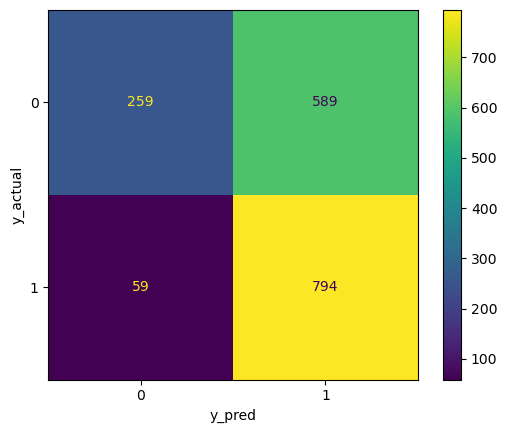

In [95]:
# visualize the confusion matrix
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, df_test['y_pred'])).plot()
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.show()